In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

titanic_data=pd.read_csv('titanic.csv')
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


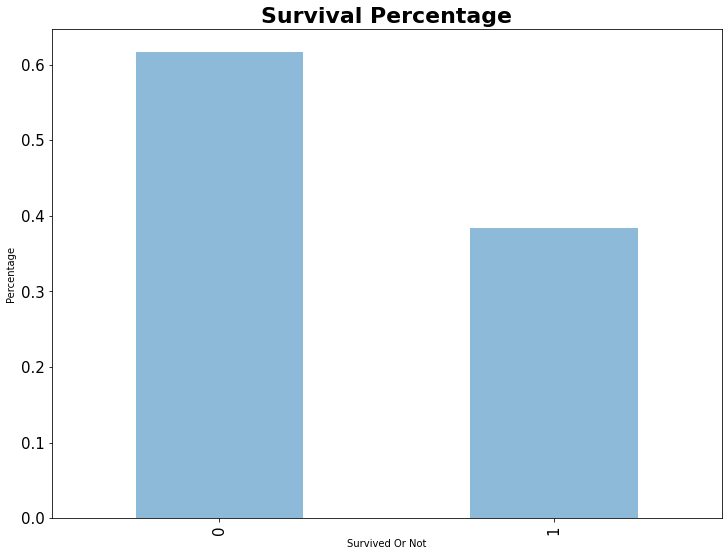

In [4]:
font = {
    'weight' : 'bold',
    'size'   : 22
}
plt.figure(figsize=(12,9))
titanic_data['Survived'].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Survived Or Not')
plt.ylabel('Percentage ')
plt.title("Survival Percentage", fontdict=font)
# plt.legend(loc='best')
plt.savefig('Survival.png')
plt.show()


In [5]:
import numpy as np

titanic_data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [6]:
print("age",titanic_data.Age.isna().sum())
print("cabin",titanic_data.Cabin.isna().sum())
print("embark",titanic_data.Embarked.isna().sum())

age 177
cabin 687
embark 2


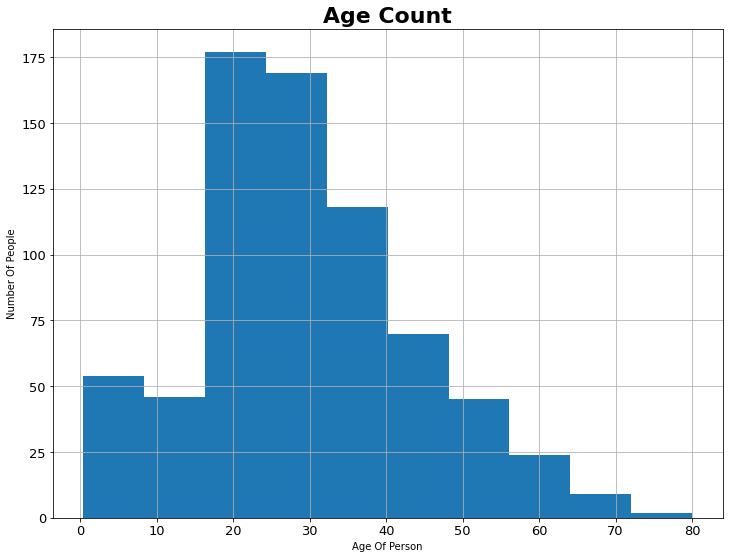

In [7]:
plt.figure(figsize=(12,9))
titanic_data.Age.hist()
plt.xticks(size=13)
plt.yticks(size=13)
plt.xlabel('Age Of Person')
plt.ylabel('Number Of People')
plt.title("Age Count", fontdict=font)
# plt.legend(loc='best')
plt.savefig('Age.png')
plt.show()

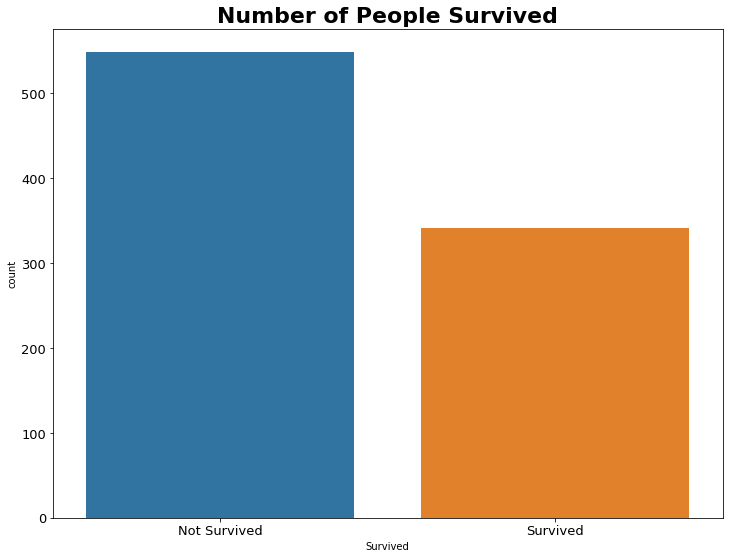

In [8]:
plt.figure(figsize=(12,9))
sns.countplot(x='Survived',data=titanic_data)
label=['Not Survived','Survived']
plt.xticks(titanic_data['Survived'].unique(), label, size=13)
plt.yticks(size=13)
plt.title("Number of People Survived", fontdict=font)
plt.savefig('survived_people.png')
plt.show()

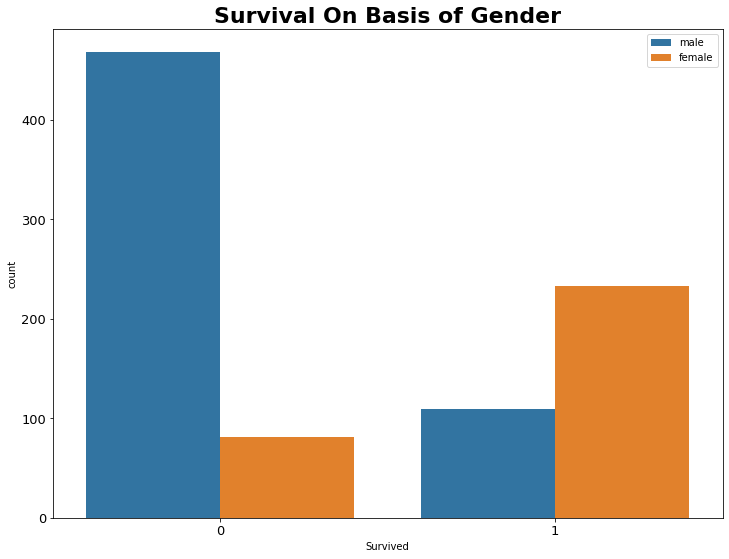

In [9]:
plt.figure(figsize=(12,9))
sns.countplot(x='Survived',hue='Sex',data=titanic_data)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title("Survival On Basis of Gender", fontdict=font)
plt.legend(loc='best')
plt.savefig('Survival_gender.png')
plt.show()

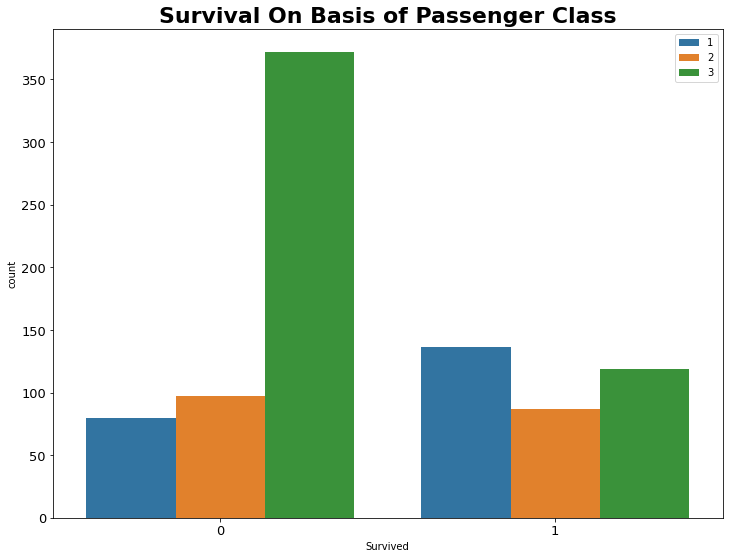

In [10]:
plt.figure(figsize=(12,9))

sns.countplot(x='Survived',hue='Pclass',data=titanic_data)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title("Survival On Basis of Passenger Class", fontdict=font)
plt.legend(loc='best')
plt.savefig('Survival_Pclass.png')
plt.show()

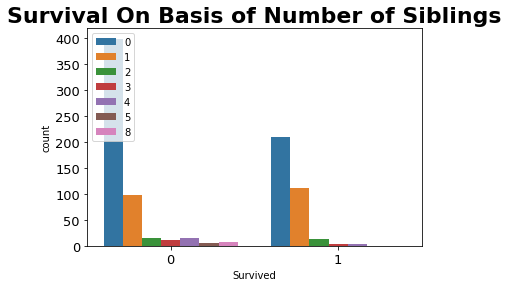

In [11]:


sns.countplot(x='Survived',hue='SibSp',data=titanic_data)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title("Survival On Basis of Number of Siblings", fontdict=font)
plt.legend(loc='best')
plt.savefig('Survival_sibling.png')
plt.show()

In [12]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [13]:
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
titanic_data.dropna(inplace=True)

titanic_data.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
Sex=pd.get_dummies(titanic_data['Sex'])
Sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [16]:
Passengerclass=pd.get_dummies(titanic_data['Pclass'])
Passengerclass.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [17]:
Embark=pd.get_dummies(titanic_data['Embarked'])
Embark.head()


,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [18]:
titanic_data=pd.concat([titanic_data,Sex,Passengerclass,Embark],axis=1)

In [19]:
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,1,2,3,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,0,1,0,0,1


In [20]:
titanic_data.drop(['PassengerId','Pclass','Name','Ticket','Embarked','Sex'],axis=1,inplace=True)

titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,female,male,1,2,3,C,Q,S
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,1,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [28]:
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression

In [22]:
X,Y=titanic_data.drop(['Survived','C','Q','S','male'],axis=1),titanic_data.Survived

In [23]:
X.head()


,Age,SibSp,Parch,Fare,female,1,2,3
0,22.0,1,0,7.2500,0,0,0,1
1,38.0,1,0,71.2833,1,1,0,0
2,26.0,0,0,7.9250,1,0,0,1
3,35.0,1,0,53.1000,1,1,0,0
4,35.0,0,0,8.0500,0,0,0,1


In [24]:
X.shape[0]


712

In [25]:
Y.shape[0]


712

In [29]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [30]:
model=LogisticRegression()

model.fit(x_train,y_train)

C:\Users\Amulya Yakkala\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
prediction=model.predict(x_test)

In [32]:
prediction


array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [33]:
x_test.head(3)

,Age,SibSp,Parch,Fare,female,1,2,3
641,24.0,0,0,69.3000,1,1,0,0
496,54.0,1,0,78.2667,1,1,0,0
262,52.0,1,1,79.6500,0,1,0,0


In [34]:
dataf=[456,24.0,1,1,67.3400,0,0,0,0,0]

testing=pd.DataFrame(dataf)
from sklearn.metrics import accuracy_score

acc_logreg = round(accuracy_score(prediction, y_test) * 100, 2)
print(acc_logreg)

80.42
